   sample_id  concentration_reactif
0          1               0.593932
1          2               0.743670
2          3               0.642487
3          4               0.590395
4          5               0.481289
Moyenne de la concentration: 0.5431977904611273


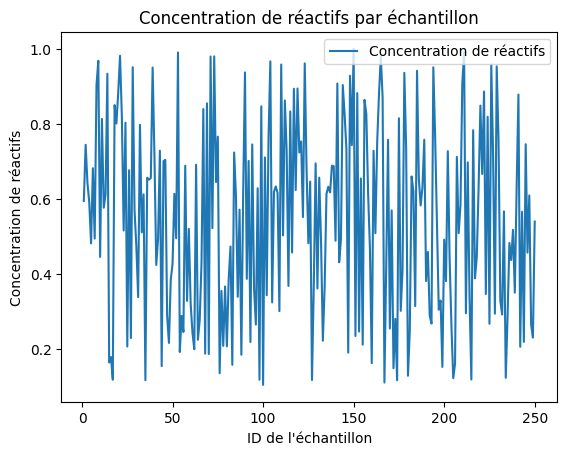

[0.14973827620058522, -0.10118339127069798, -0.052092173767272376, -0.10910554529219285, 0.20001538235497618]


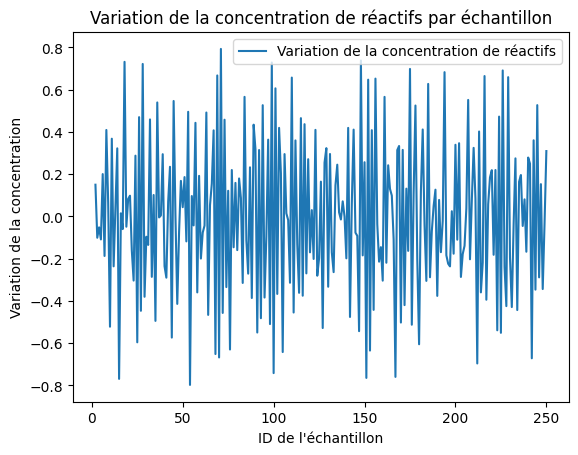

ValueError: too many values to unpack (expected 2)

In [4]:
import pandas as pd

# 1. Extraction des données

# Charger les données
data = pd.read_csv('data_chimie.csv')
print(data.head())

# 2. Manipulation des données

concentrations = data['concentration_reactif']

# Calculer la moyenne de la concentration
total = 0
compteur = 0
for value in concentrations:
    total += value
    compteur += 1
moyenne_concentration = total / compteur
print(f'Moyenne de la concentration: {moyenne_concentration}')

# 3. Visualisation de la concentration des réactifs par échantillon

import matplotlib.pyplot as plt

# Tracer la concentration de réactifs par échantillon
plt.plot(data['sample_id'], concentrations, label='Concentration de réactifs')
plt.xlabel('ID de l\'échantillon')
plt.ylabel('Concentration de réactifs')
plt.title('Concentration de réactifs par échantillon')
plt.legend()
plt.show()

# 3.a Visualisation de la concentration des réactifs par X

# 4. Calculs 

## 4.1 Dérivée

derivee_concentration = [concentrations[i] - concentrations[i-1] for i in range(1, len(concentrations))]
print(derivee_concentration[:5])

# Visualiser la dérivée
plt.plot(data['sample_id'][1:], derivee_concentration, label='Variation de la concentration de réactifs')
plt.xlabel('ID de l\'échantillon')
plt.ylabel('Variation de la concentration')
plt.title('Variation de la concentration de réactifs par échantillon')
plt.legend()
plt.show()

# 5. Régression linéaire

import numpy as np

x = np.array(data['sample_id'])
y = np.array(concentrations)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)
print(f'Pente: {m}, Intercept: {c}')

# Visualiser la régression linéaire
plt.plot(x, y, 'o', label='Données originales', markersize=10)
plt.plot(x, m*x + c, 'r', label='Régression linéaire')
plt.xlabel('ID de l\'échantillon')
plt.ylabel('Concentration de réactifs')
plt.title('Régression linéaire de la concentration de réactifs par échantillon')
plt.legend()
plt.show()

# 6. Analyse statistique

# 6.1 Médiane
sorted_concentration = sorted(concentrations)
n = len(sorted_concentration)
if n % 2 == 0:
    median_concentration = (sorted_concentration[n//2 - 1] + sorted_concentration[n//2]) / 2
else:
    median_concentration = sorted_concentration[n//2]
print(f'Médiane de la concentration: {median_concentration}')

# 6.2 Écart-type
mean_concentration = sum(concentrations) / len(concentrations)
variance = sum((x - mean_concentration) ** 2 for x in concentrations) / len(concentrations)
std_deviation = variance ** 0.5
print(f'Écart-type de la concentration: {std_deviation}')

# 6.3 Variance
print(f'Variance de la concentration: {variance}')

# Corrélation avec la croissance cellulaire (exemple)
croissance_data = pd.read_csv('data_biologie.csv')['croissance_cellulaire']
mean_croissance = sum(croissance_data) / len(croissance_data)
covariance = sum((concentrations[i] - mean_concentration) * (croissance_data[i] - mean_croissance) for i in range(len(concentrations))) / len(concentrations)
std_croissance = (sum((x - mean_croissance) ** 2 for x in croissance_data) / len(croissance_data)) ** 0.5
correlation = covariance / (std_deviation * std_croissance)
print(f'Corrélation entre concentration de réactifs et croissance cellulaire: {correlation}')


